In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fb82a0738d374fd2b1af92c56f50fd7b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HCONVxvHhzZ5tA8w-EdQ0cmwfK5INwyeNAocBsr2BqcB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb82a0738d374fd2b1af92c56f50fd7b.get_object(Bucket='lifeexpectancyusingmlpython-donotdelete-pr-zgb3beifhhjydz',Key='life_expectancy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

life = pd.read_csv(body)
life.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

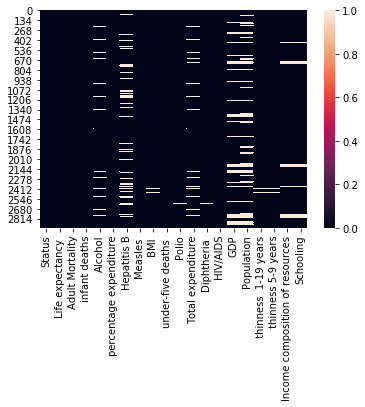

In [3]:
life=life.drop(['Year','Country'],axis=1)
sns.heatmap(pd.isnull(life))
life.isnull().sum()

In [4]:
life["Alcohol"]=life["Alcohol"].fillna(value=life["Alcohol"].mean())
life["Income composition of resources"]=life["Income composition of resources"].fillna(value=life["Income composition of resources"].mean())
life[" thinness  1-19 years"]=life[" thinness  1-19 years"].fillna(value=life[" thinness  1-19 years"].mean())
life[" thinness 5-9 years"]=life[" thinness 5-9 years"].fillna(value=life[" thinness 5-9 years"].mean())
life["Schooling"]=life["Schooling"].fillna(value=life["Schooling"].mean())
life["Polio"]=life["Polio"].fillna(value=life["Polio"].mean())
life["Population"]=life["Population"].fillna(value=life["Population"].mean())
life["GDP"]=life["GDP"].fillna(value=life["GDP"].mean())
life["Diphtheria "]=life["Diphtheria "].fillna(value=life["Diphtheria "].mean())
life["Life expectancy "]=life["Life expectancy "].fillna(value=life["Life expectancy "].mean())
life[" BMI "]=life[" BMI "].fillna(value=life[" BMI "].mean())
life["Adult Mortality"]=life["Adult Mortality"].fillna(value=life["Adult Mortality"].mean())
life["Hepatitis B"]=life["Hepatitis B"].fillna(value=life["Hepatitis B"].mean())
life["Total expenditure"]=life["Total expenditure"].fillna(value=life["Total expenditure"].mean())
life.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

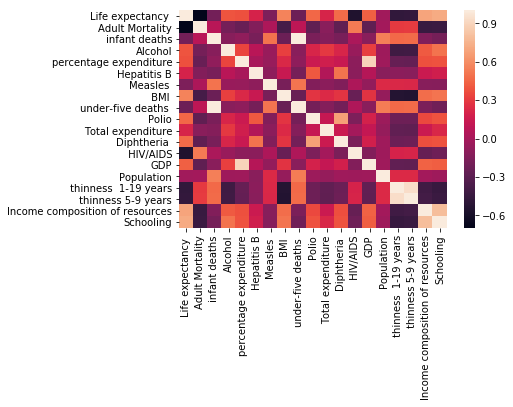

In [5]:
correlated_data=life.corr()
sns.heatmap(correlated_data)

In [6]:
y=life["Life expectancy "]
X=life.drop("Life expectancy ",axis=1)

In [7]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
status_dummy=pd.get_dummies(X['Status'])

In [9]:
X.drop(['Status'],inplace=True,axis=1)

In [10]:
X=pd.concat([X,status_dummy],axis=1)

In [11]:
X.shape

(2938, 20)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred = regr.predict(X_test)
np.set_printoptions(precision=2)
y_pred=np.array(y_pred)
y_test=np.array(y_test)
print(np.concatenate((y_pred.reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1))

[[62.77 62.5 ]
 [53.77 53.6 ]
 [83.2  83.3 ]
 ...
 [55.32 55.  ]
 [69.64 69.4 ]
 [74.85 75.  ]]


In [15]:
accuracy=regr.score(X_test,y_test)
print("Accuracy: ",accuracy)

Accuracy:  0.9949815810556


In [16]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(regr,X_train,y_train,cv=10)
accuracies.mean()

0.9575552120811068

In [17]:
!pip install watson-machine-learning-client

In [18]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-26 14:01:16,537 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [19]:
credentials={
  "apikey": "aVggYkyANUqRxtWT4mKBGUzLIhuR-VHEMpCX-PTIhDUD",
  "iam_apikey_description": "Auto-generated for key 3da26ca6-fea8-4a91-9aa8-a96b15dfbb5b",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/1ca26cf8e9a9464b90e7c0669491f46f::serviceid:ServiceId-ebb25b57-cef7-405e-b0c6-2b323026203e",
  "instance_id": "394fe6cd-f092-4cfb-8251-0c2bb7d0d714",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [20]:
client= WatsonMachineLearningAPIClient(credentials)

In [21]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME: "Mitesh",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "miteshmdeodhar@gmail.com",
    client.repository.ModelMetaNames.NAME: "Life expectancy using ML (python)"
}

In [22]:
model_artifact=client.repository.store_model(regr,meta_props=model_props)

In [23]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [24]:
deployment=client.deployments.create(published_model_uid,name="Life expectancy using ML (python)")



#######################################################################################

Synchronous deployment creation for uid: 'b582b58b-73a6-4f03-bb94-5a2ab0fc3192' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7184b964-1384-4d2d-b26d-f923622578c1'
------------------------------------------------------------------------------------------------




In [25]:
client.deployments.list()

------------------------------------  ---------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                               TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
7184b964-1384-4d2d-b26d-f923622578c1  Life expectancy using ML (python)  online  DEPLOY_SUCCESS  2020-07-26T14:01:37.724Z  scikit-learn-0.20  model
c4b02781-5954-4aba-aa90-4b1a9432d7de  Life expectancy using ML (python)  online  DEPLOY_SUCCESS  2020-07-20T12:20:44.735Z  scikit-learn-0.20  model
84214028-b078-48d8-96d9-10de53f5e444  Life expectancy using ML (python)  online  DEPLOY_SUCCESS  2020-07-20T12:08:51.886Z  scikit-learn-0.20  model
5a4d8501-d5e5-45f1-8847-a243a402c78a  Life expectancy using ML (python)  online  DEPLOY_SUCCESS  2020-07-18T12:12:40.477Z  scikit-learn-0.20  model
------------------------------------  ---------------------------------  ------  -------------- 

In [26]:
scoring_endpoint=client.deployments.get_scoring_url(deployment)

In [27]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/394fe6cd-f092-4cfb-8251-0c2bb7d0d714/deployments/7184b964-1384-4d2d-b26d-f923622578c1/online'